In [127]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import utils

# Downloading the Dataset

In [128]:
df = sns.load_dataset("penguins")
df.rename(columns={"bill_length_mm": "culmen_length_mm", "bill_depth_mm": "culmen_depth_mm"}, inplace=True)
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


## Removing NaN values

In [129]:
df.dropna(inplace=True)
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


## Visualizing the Data

In [130]:
value_columns = ["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g"]

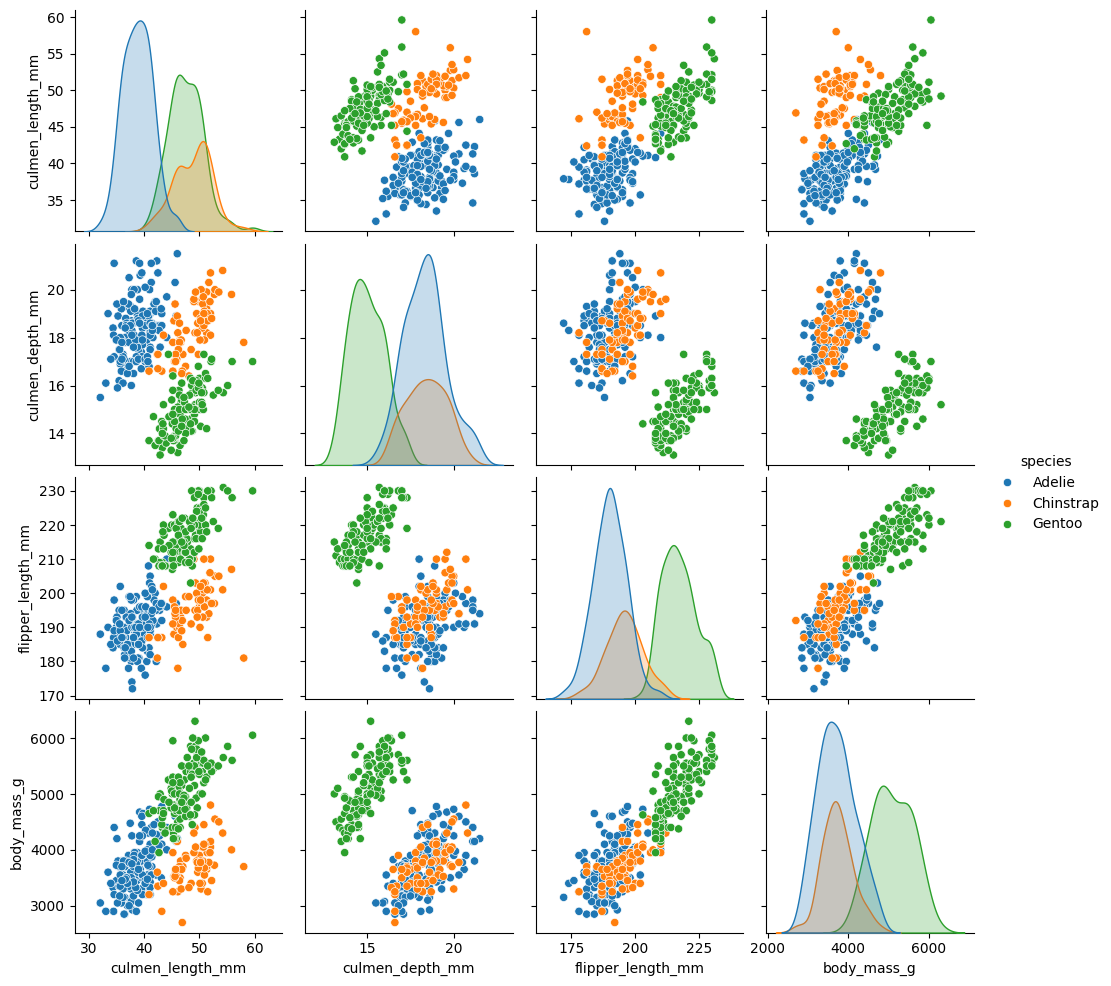

In [131]:
sns.pairplot(df, hue="species")

In [132]:

df[value_columns].corr(method='pearson').style.background_gradient(cmap='coolwarm')

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.228626,0.653096,0.589451
culmen_depth_mm,-0.228626,1.000000,-0.577792,-0.472016
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979
body_mass_g,0.589451,-0.472016,0.872979,1.000000


# Replacing species names with their respective codes

In [133]:

df["species"] = df["species"].map({name: i for i, name in enumerate(df["species"].unique())})
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,Torgersen,39.1,18.7,181.0,3750.0,Male
1,0,Torgersen,39.5,17.4,186.0,3800.0,Female
2,0,Torgersen,40.3,18.0,195.0,3250.0,Female
4,0,Torgersen,36.7,19.3,193.0,3450.0,Female
5,0,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,2,Biscoe,47.2,13.7,214.0,4925.0,Female
340,2,Biscoe,46.8,14.3,215.0,4850.0,Female
341,2,Biscoe,50.4,15.7,222.0,5750.0,Male
342,2,Biscoe,45.2,14.8,212.0,5200.0,Female


# Applaying the PCA

## Standarization

In [134]:
x_penguins = df[value_columns].values
y = df["species"].values

In [135]:
x_standardized = StandardScaler().fit_transform(x_penguins)

In [136]:
df_cancer_standarize = pd.DataFrame(data = x_standardized, columns = value_columns)
df_cancer_standarize['species'] = df['species'].values
df_cancer_standarize

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,species
0,-0.896042,0.780732,-1.426752,-0.568475,0
1,-0.822788,0.119584,-1.069474,-0.506286,0
2,-0.676280,0.424729,-0.426373,-1.190361,0
3,-1.335566,1.085877,-0.569284,-0.941606,0
4,-0.859415,1.747026,-0.783651,-0.692852,0
...,...,...,...,...,...
328,0.587352,-1.762145,0.931283,0.892957,2
329,0.514098,-1.457000,1.002739,0.799674,2
330,1.173384,-0.744994,1.502928,1.919069,2
331,0.221082,-1.202712,0.788372,1.234995,2


## 2D

In [137]:
df_f_standarized_2d, pca_standarized_2d = utils.perform_pca(x_standardized, 'species', y,  n_components=2)
df_f_standarized_2d

,principal component 1,principal component 2,species
0,-1.853593,0.032069,0
1,-1.316254,-0.443527,0
2,-1.376605,-0.161230,0
3,-1.885288,-0.012351,0
4,-1.919981,0.817598,0
...,...,...,...
328,1.997716,-0.976771,2
329,1.832651,-0.784510,2
330,2.751505,0.266556,2
331,1.713854,-0.725875,2


In [138]:
utils.print_pca_exp_variance(pca_standarized_2d)

Expplained variance ratio
[0.68633893 0.19452929]

Total explained variance
88.09%


Components are the linear combinations of the original features with the following weights

In [139]:
pd.DataFrame(pca_standarized_2d.components_, columns=value_columns, index=['PC1', 'PC2']).T.style.background_gradient(cmap='coolwarm')

,PC1,PC2
culmen_length_mm,0.453753,0.600195
culmen_depth_mm,-0.399047,0.796170
flipper_length_mm,0.576825,0.005788
body_mass_g,0.549675,0.076464


In [140]:
df_f_standarized_3d, pca_standarized_3d = utils.perform_pca(x_standardized, 'species', y,  n_components=3)

In [141]:
utils.print_pca_exp_variance(pca_standarized_3d)

Expplained variance ratio
[0.68633893 0.19452929 0.09216063]

Total explained variance
97.30%


In [142]:
pd.DataFrame(pca_standarized_3d.components_, columns=value_columns, index=['PC1', 'PC2', 'PC3']).T.style.background_gradient(cmap='coolwarm')

,PC1,PC2,PC3
culmen_length_mm,0.453753,0.600195,0.642495
culmen_depth_mm,-0.399047,0.796170,-0.425800
flipper_length_mm,0.576825,0.005788,-0.236095
body_mass_g,0.549675,0.076464,-0.591737


# Reapplaying the PCA on unstandardized data

In [143]:
df_f_unstandardized_2d, pca_unstandarized_2d = utils.perform_pca(x_penguins, 'species', y,  n_components=2)
df_f_unstandardized_2d

,principal component 1,principal component 2,species
0,-457.325073,-13.351587,0
1,-407.252205,-9.179113,0
2,-957.044676,8.160444,0
3,-757.115802,1.867653,0
4,-557.177302,-3.389158,0
...,...,...,...
328,718.068699,2.338199,2
329,643.090909,4.280699,2
330,1543.098355,-2.232010,2
331,992.994900,-4.605154,2


In [144]:
utils.print_pca_exp_variance(pca_unstandarized_2d)

Expplained variance ratio
[9.99893229e-01 7.82232504e-05]

Total explained variance
100.00%


In [145]:
pd.DataFrame(pca_unstandarized_2d.components_, columns=value_columns, index=['PC1', 'PC2']).T.style.background_gradient(cmap='coolwarm')

,PC1,PC2
culmen_length_mm,0.004003,0.319278
culmen_depth_mm,-0.001154,-0.086848
flipper_length_mm,0.015195,0.943542
body_mass_g,0.999876,-0.015717


In [146]:
df_f_unstandardized_3d, pca_unstandarized_3d = utils.perform_pca(x_penguins, 'species', y,  n_components=3)

In [147]:
utils.print_pca_exp_variance(pca_unstandarized_3d)

Expplained variance ratio
[9.99893229e-01 7.82232504e-05 2.49073610e-05]

Total explained variance
100.00%


In [148]:
pd.DataFrame(pca_unstandarized_3d.components_, columns=value_columns, index=['PC1', 'PC2', 'PC3']).T.style.background_gradient(cmap='coolwarm')

,PC1,PC2,PC3
culmen_length_mm,0.004003,0.319278,0.941265
culmen_depth_mm,-0.001154,-0.086848,0.144495
flipper_length_mm,0.015195,0.943542,-0.305190
body_mass_g,0.999876,-0.015717,0.001036


# Visualize the difference between standardized and unstandardized PCA

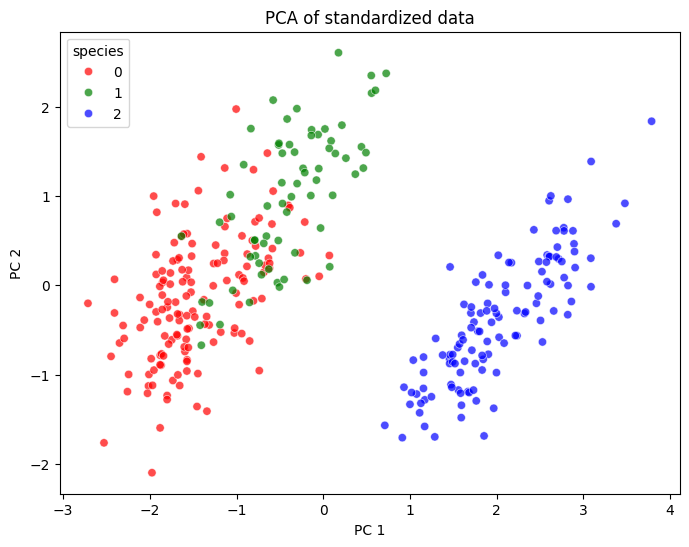

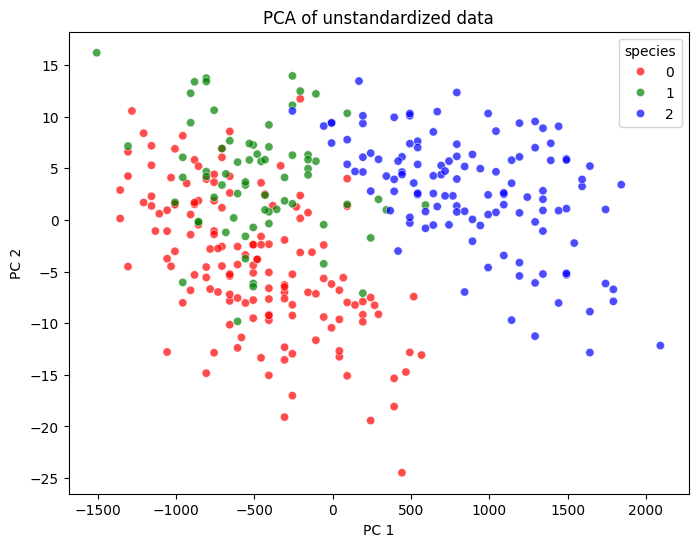

In [149]:
utils.plot_pca_2d(df_f_standarized_2d, 'species', "PCA of standardized data")
utils.plot_pca_2d(df_f_unstandardized_2d, 'species', "PCA of unstandardized data")

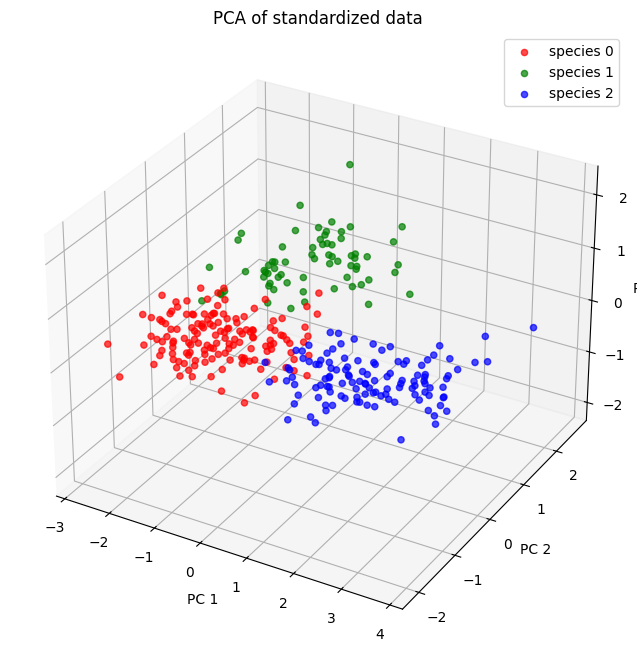

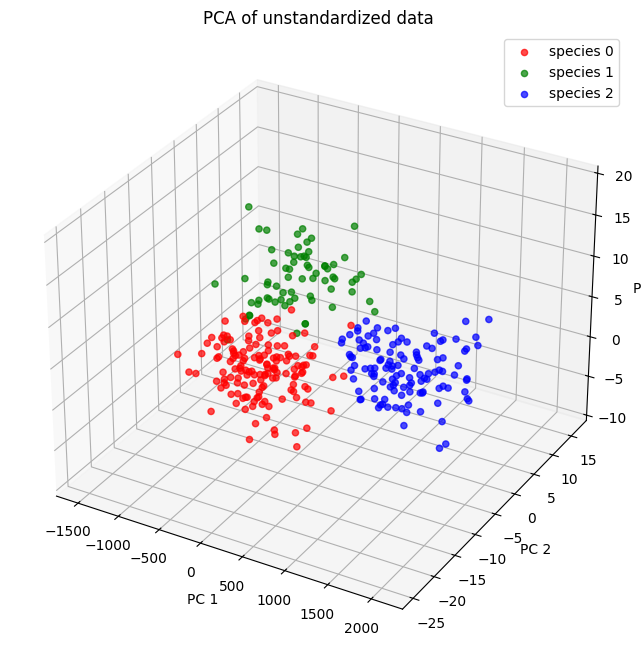

In [150]:
utils.plot_pca_3d(df_f_standarized_3d, 'species', "PCA of standardized data")
utils.plot_pca_3d(df_f_unstandardized_3d, 'species', "PCA of unstandardized data")

On the 2d plots we can observe that the PCA on the standardized data is more spread out than the PCA on the unstandardized data, leading to the better separation, even though the variance explained by unstandardized PCA is higher (100% vs 88%).

On the other hand on 3d plot for the unstandarized data we see better separation between species 0 and species 2 and slightly better separation between species 0 and species 1 than on the standarized data.

# Proposing better standardization method

## MinMaxScaler

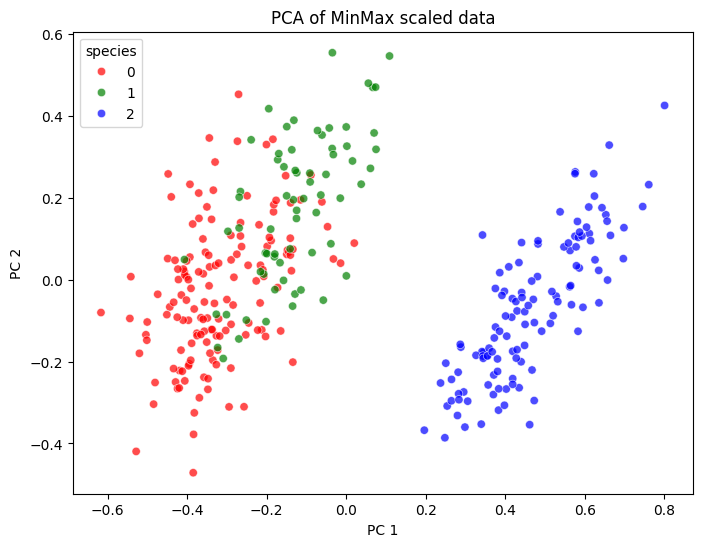

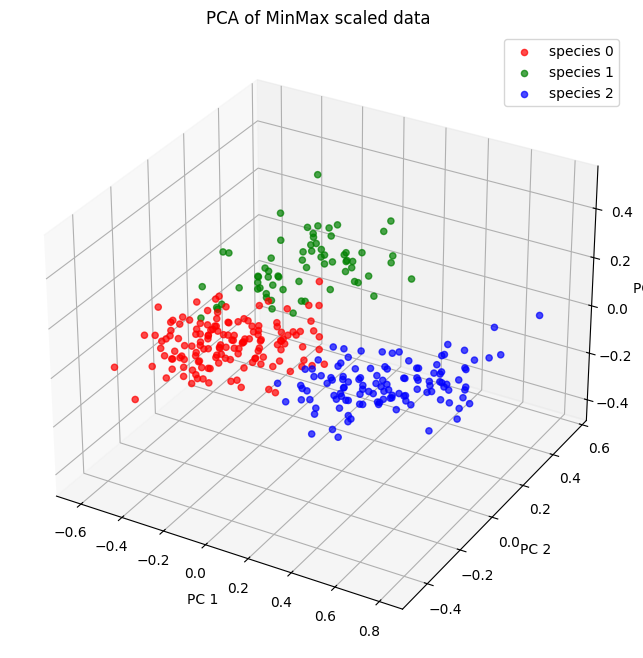

In [151]:
# check MinMax Scaller
from sklearn.preprocessing import MinMaxScaler

x_minmax = MinMaxScaler().fit_transform(x_penguins)
df_minmax_2d = utils.perform_pca(x_minmax, 'species', y, n_components=2)[0]
df_minmax_3d = utils.perform_pca(x_minmax, 'species', y, n_components=3)[0]

utils.plot_pca_2d(df_minmax_2d, 'species', "PCA of MinMax scaled data")
utils.plot_pca_3d(df_minmax_3d, 'species', "PCA of MinMax scaled data")

## RobustScaler

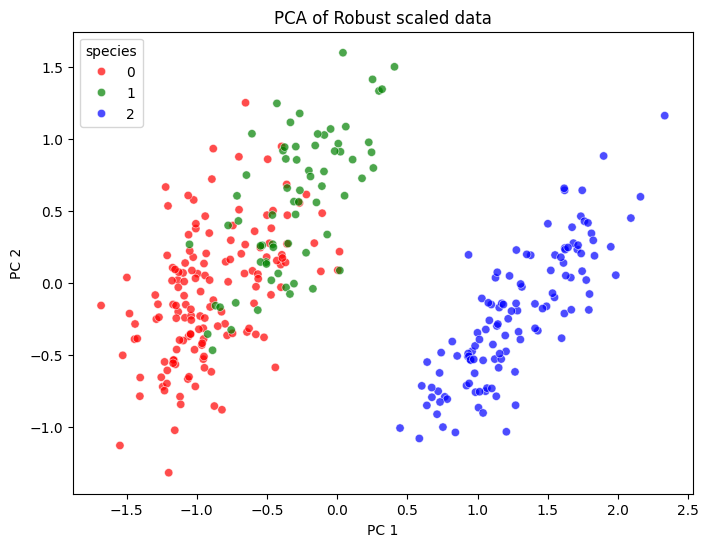

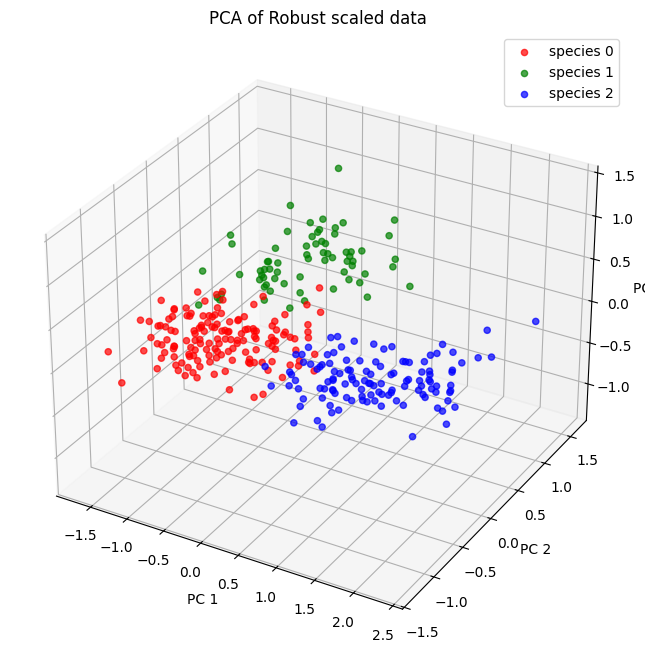

In [152]:
from sklearn.preprocessing import RobustScaler
x_robust = RobustScaler().fit_transform(x_penguins)
df_robust_2d = utils.perform_pca(x_robust, 'species', y, n_components=2)[0]
df_robust_3d = utils.perform_pca(x_robust, 'species', y, n_components=3)[0]
utils.plot_pca_2d(df_robust_2d, 'species', "PCA of Robust scaled data")
utils.plot_pca_3d(df_robust_3d, 'species', "PCA of Robust scaled data")

## QuantileTransformer

c:\Users\Ignacy\Desktop\programowanie\Studia\sem6\AI_1\.venv\Lib\site-packages\sklearn\preprocessing\_data.py:2829: UserWarning: n_quantiles (1000) is greater than the total number of samples (333). n_quantiles is set to n_samples.
  warnings.warn(


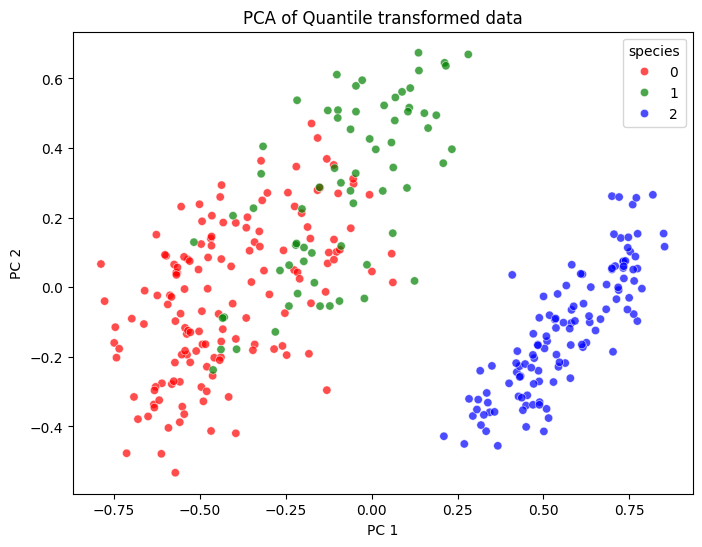

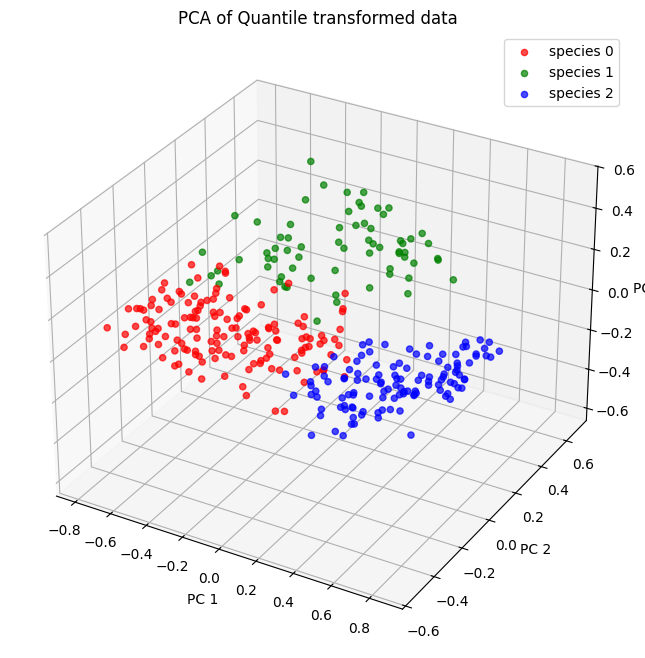

In [153]:
from sklearn.preprocessing import QuantileTransformer
x_quantile = QuantileTransformer().fit_transform(x_penguins)
df_quantile_2d = utils.perform_pca(x_quantile, 'species', y, n_components=2)[0]
df_quantile_3d = utils.perform_pca(x_quantile, 'species', y, n_components=3)[0]
utils.plot_pca_2d(df_quantile_2d, 'species', "PCA of Quantile transformed data")
utils.plot_pca_3d(df_quantile_3d, 'species', "PCA of Quantile transformed data")

## PowerTransformer

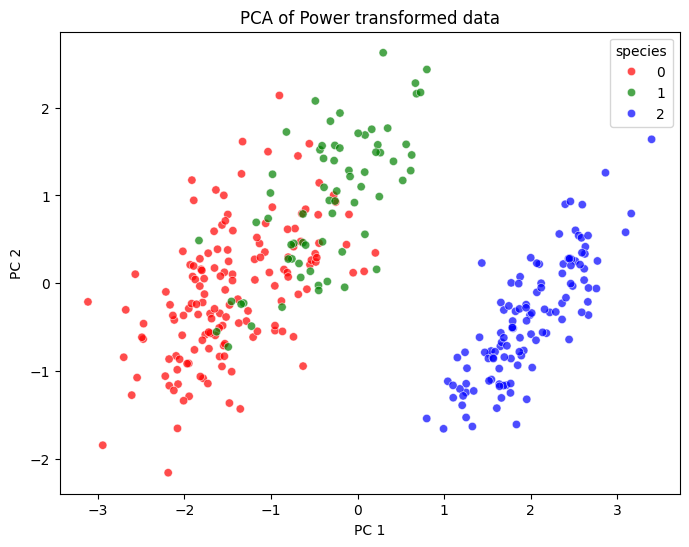

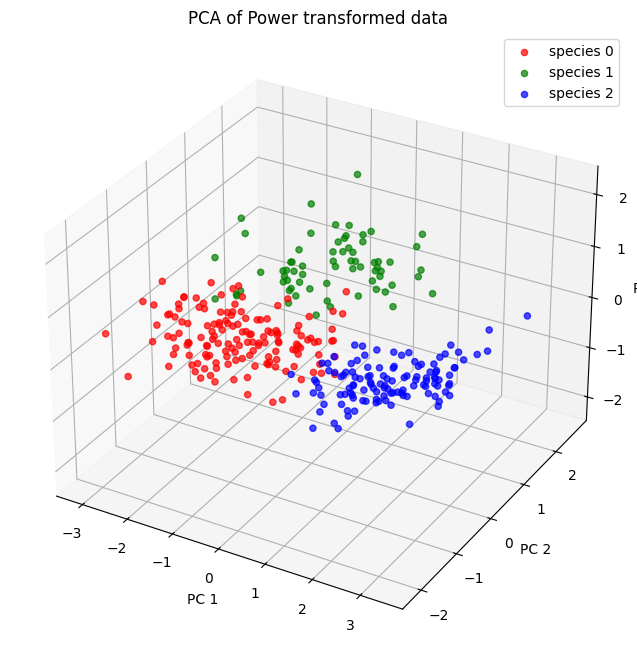

In [154]:
from sklearn.preprocessing import PowerTransformer
x_power = PowerTransformer().fit_transform(x_penguins)
df_power_2d = utils.perform_pca(x_power, 'species', y, n_components=2)[0]
df_power_3d = utils.perform_pca(x_power, 'species', y, n_components=3)[0]
utils.plot_pca_2d(df_power_2d, 'species', "PCA of Power transformed data")
utils.plot_pca_3d(df_power_3d, 'species', "PCA of Power transformed data")

## Normalizer

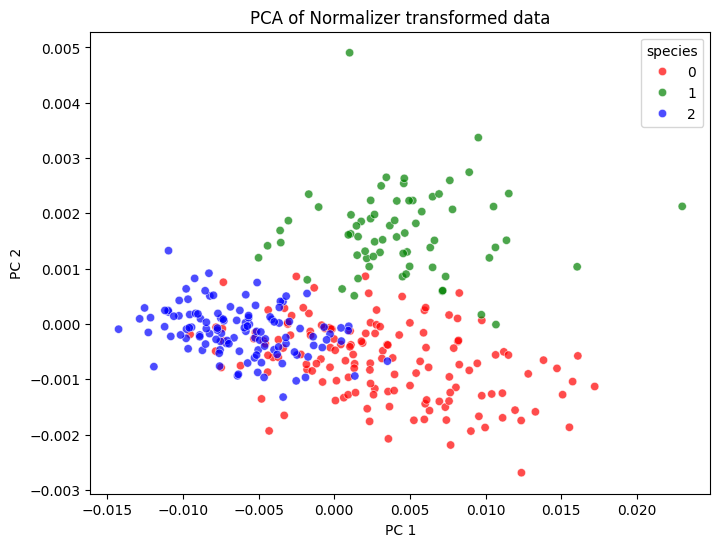

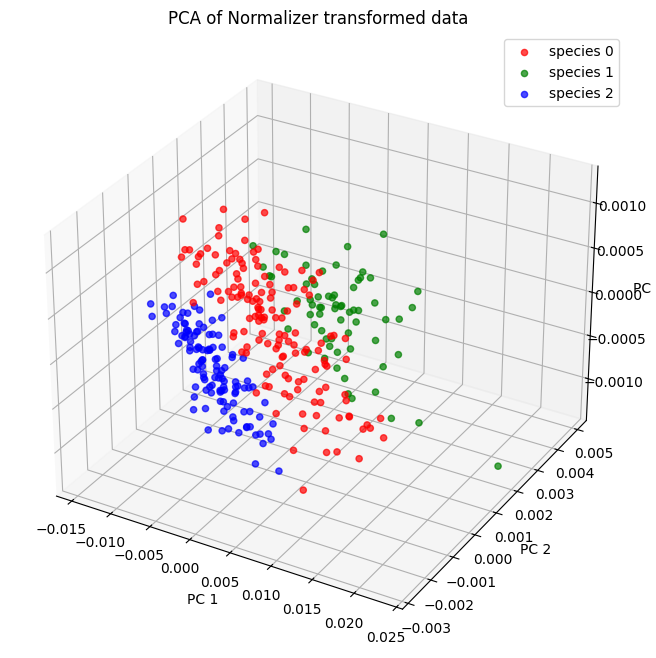

In [155]:
from sklearn.preprocessing import Normalizer
x_normalizer = Normalizer().fit_transform(x_penguins)
df_normalizer_2d = utils.perform_pca(x_normalizer, 'species', y, n_components=2)[0]
df_normalizer_3d = utils.perform_pca(x_normalizer, 'species', y, n_components=3)[0]
utils.plot_pca_2d(df_normalizer_2d, 'species', "PCA of Normalizer transformed data")
utils.plot_pca_3d(df_normalizer_3d, 'species', "PCA of Normalizer transformed data")

## MaxAbsScaler

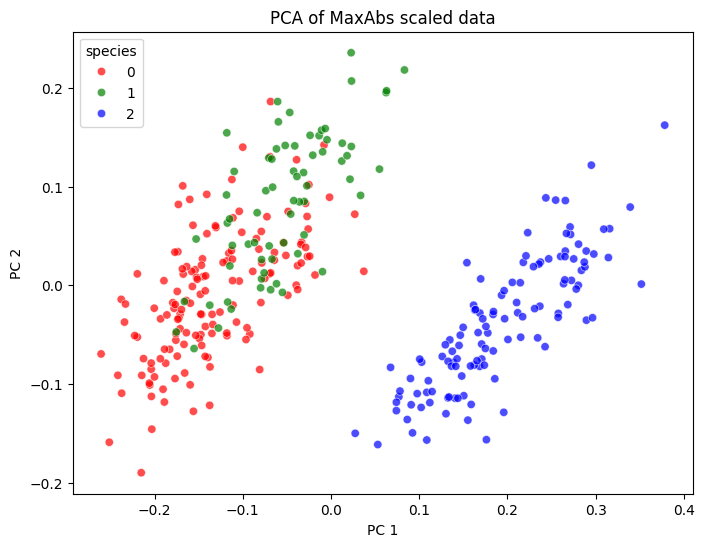

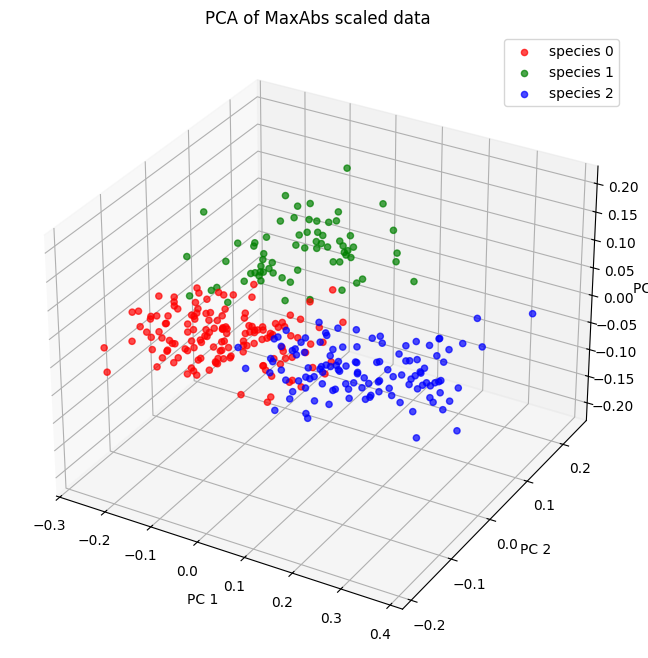

In [156]:
from sklearn.preprocessing import MaxAbsScaler
x_maxabs = MaxAbsScaler().fit_transform(x_penguins)
df_maxabs_2d = utils.perform_pca(x_maxabs, 'species', y, n_components=2)[0]
df_maxabs_3d = utils.perform_pca(x_maxabs, 'species', y, n_components=3)[0]
utils.plot_pca_2d(df_maxabs_2d, 'species', "PCA of MaxAbs scaled data")
utils.plot_pca_3d(df_maxabs_3d, 'species', "PCA of MaxAbs scaled data")

## LogTransformer

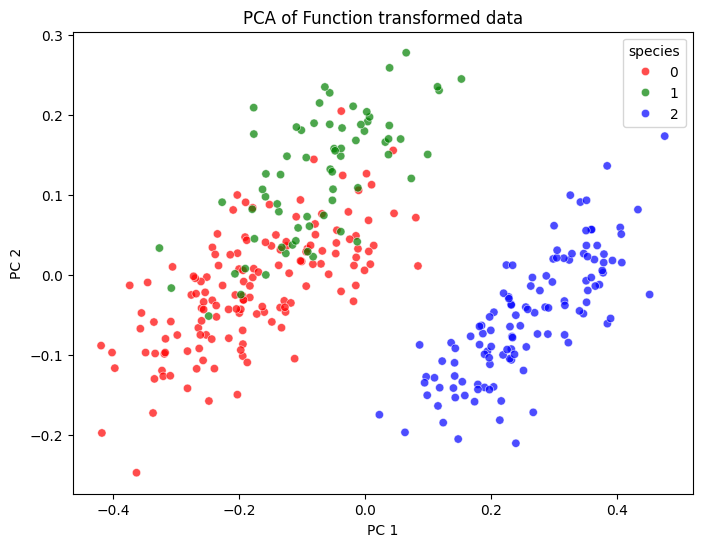

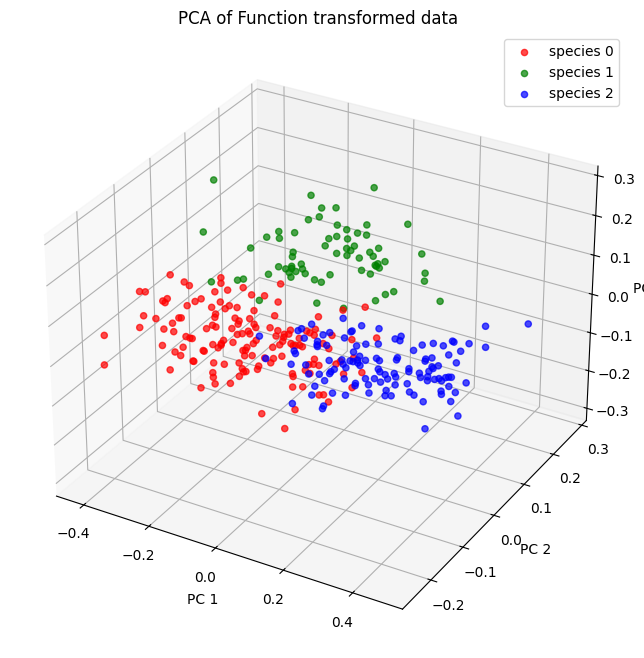

In [157]:
from sklearn.preprocessing import FunctionTransformer
x_function = FunctionTransformer(np.log1p).fit_transform(x_penguins)
df_function_2d = utils.perform_pca(x_function, 'species', y, n_components=2)[0]
df_function_3d = utils.perform_pca(x_function, 'species', y, n_components=3)[0]
utils.plot_pca_2d(df_function_2d, 'species', "PCA of Function transformed data")
utils.plot_pca_3d(df_function_3d, 'species', "PCA of Function transformed data")

## PolynomialTransformer

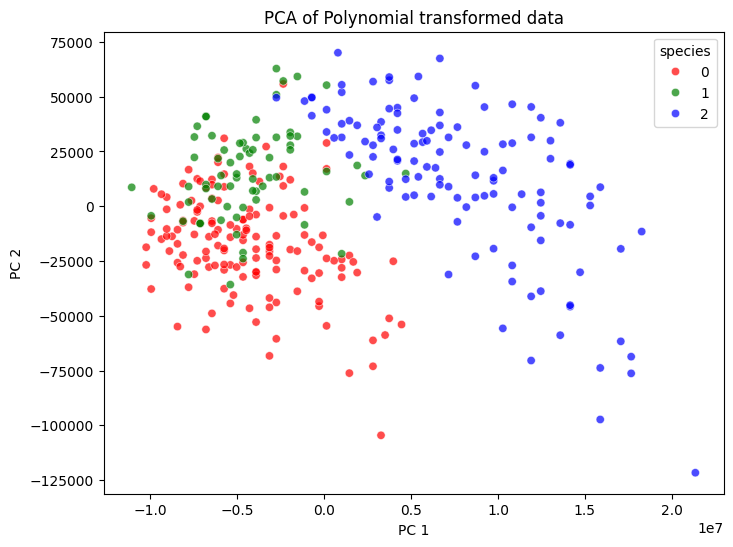

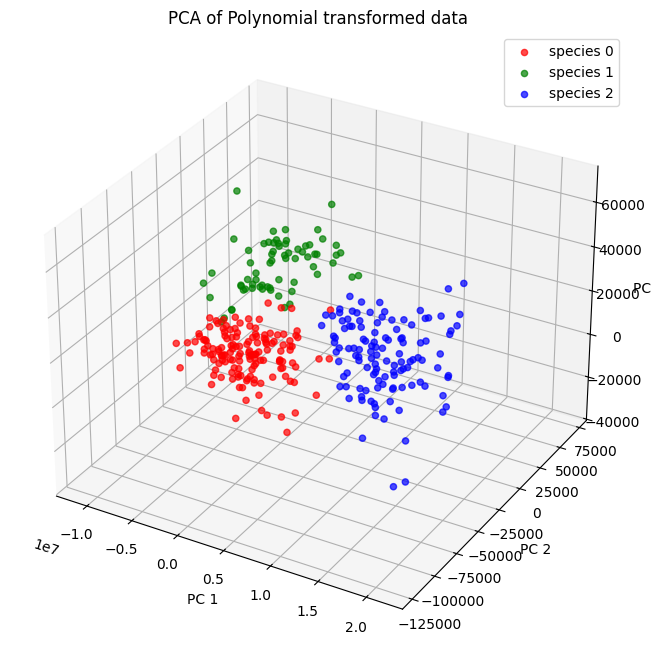

In [158]:
from sklearn.preprocessing import PolynomialFeatures
x_polynomial = PolynomialFeatures(degree=2).fit_transform(x_penguins)
df_polynomial_2d = utils.perform_pca(x_polynomial, 'species', y, n_components=2)[0]
df_polynomial_3d = utils.perform_pca(x_polynomial, 'species', y, n_components=3)[0]
utils.plot_pca_2d(df_polynomial_2d, 'species', "PCA of Polynomial transformed data")
utils.plot_pca_3d(df_polynomial_3d, 'species', "PCA of Polynomial transformed data")

Based on the above results of the Scalers and Transformers accesible in sci-kit learn library, we observe that none of the methods are able to provide better separation between the species than the PCA on the standardized data.

Most of the methods provide also very similar separation between the species on the 3D PCA, but using PolynomialFeatures to transform the data before applying PCA seems to provide the best separation of the species.